In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv('student_data.csv')  # Adjust path if needed

In [4]:
# Convert G3 to Pass/Fail for classification
df['Performance'] = df['G3'].apply(lambda x: 'Pass' if x >= 10 else 'Fail')

# Drop original G1, G2, G3
df = df.drop(['G1', 'G2', 'G3'], axis=1)

In [5]:
# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [6]:
# Encode target
target_le = LabelEncoder()
df['Performance'] = target_le.fit_transform(df['Performance'])
print("Target encoding:", dict(zip(target_le.classes_, target_le.transform(target_le.classes_))))  # {'Fail': 0, 'Pass': 1}


Target encoding: {0: 0, 1: 1}


In [7]:
# Split features and target
X = df.drop('Performance', axis=1)
y = df['Performance']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


=== Naive Bayes - Student Performance ===
0 => Fail
1 => Pass

Confusion Matrix:
 [[ 9 18]
 [ 5 47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.33      0.44        27
           1       0.72      0.90      0.80        52

    accuracy                           0.71        79
   macro avg       0.68      0.62      0.62        79
weighted avg       0.70      0.71      0.68        79

Accuracy: 0.7088607594936709


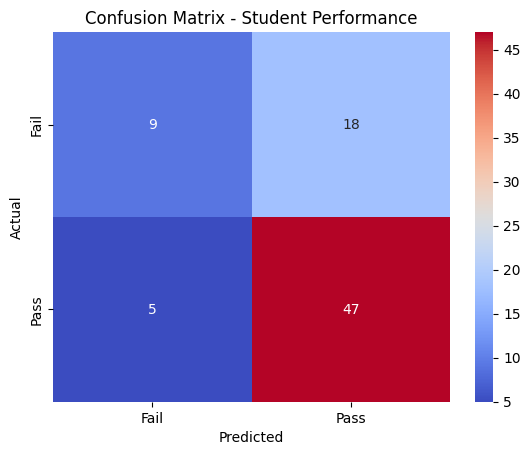

In [8]:
# Evaluation
print("\n=== Naive Bayes - Student Performance ===")
print("0 => Fail\n1 => Pass\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix heatmap
labels = ['Fail', 'Pass']
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=labels, yticklabels=labels, cmap='coolwarm')
plt.title("Confusion Matrix - Student Performance")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()